In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve

In [62]:
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv")

In [63]:
df.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [64]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

In [65]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [66]:
# outlier removal
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)


# the function is empty means 
# it will take the default argumrnts 
# with out hyperparameter tuning

DecisionTreeClassifier()

In [69]:
DT.get_params() # to get all hyperparameter of models

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [70]:
# prediction
y_prediction = DT.predict(x_test)

In [71]:
# model evalutation
print(y_test.values[:20])
print(y_prediction[:20])

[0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0]
[1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0]


In [72]:
DT_accurecy = accuracy_score(y_test,y_prediction)
DT_accurecy

0.7569803516028956

In [73]:
confusion_matrix(y_test,y_prediction)

array([[216, 112],
       [123, 516]], dtype=int64)

In [74]:
confusion_matrix(y_test,y_prediction).ravel()
# TN, FP, FN, TP

array([216, 112, 123, 516], dtype=int64)

In [75]:
TN, FP, FN, TP = confusion_matrix(y_test,y_prediction).ravel()

In [76]:
# Precision TP/(TP+FP)
precision = TP/(TP+FP)
precision

0.821656050955414

In [77]:
# recall TP/(TP+FN)
recall = TP / (TP+FN)
recall

0.8075117370892019

In [78]:
# F1 Score (2*precision * recall)/ (precision+recall)
F1Score = (2*precision*recall) / (precision+recall)
F1Score

0.8145224940805051

In [79]:
acc= accuracy_score(y_test,y_prediction)
pre = precision_score(y_test,y_prediction)
recl = recall_score(y_test,y_prediction)
f1scor = f1_score(y_test,y_prediction)
print(acc)
print(pre)
print(recl)
print(f1scor)

0.7569803516028956
0.821656050955414
0.8075117370892019
0.8145224940805051


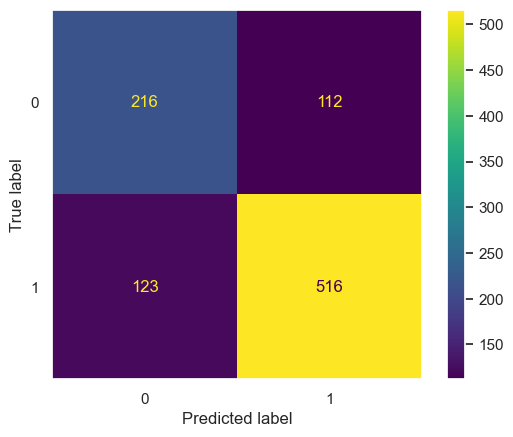

In [80]:
cmt = confusion_matrix(y_test,y_prediction)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)

In [81]:
DT.predict_proba(x_test)
# NO   YES
# [0    1] == max : 1  === yes : 1
# [1    0] == max : 1 ==== no :  0
# [0    1] == max : 1  === yes : 1

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [82]:
y_predict_probability = DT.predict_proba(x_test)

roc auc curve  calculated on probability of prediction 

roc-auc curve : FPR vs TPR
y_predict_probability 

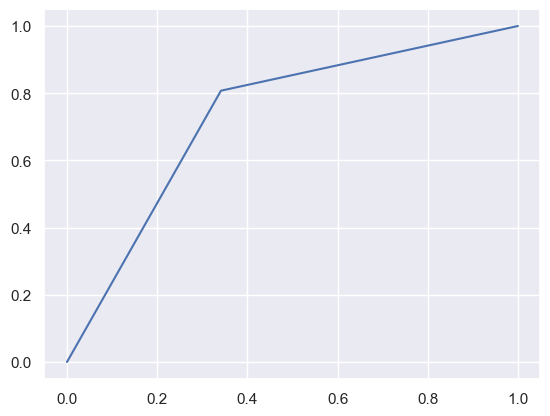

In [83]:
fpr, tpr, thershold = roc_curve(y_test,y_predict_probability[:,1])
plt.plot(fpr,tpr)

In [84]:
# step 1
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

# step 2



DecisionTreeClassifier()

accuray is: 76.42
F1 is: 0.83
Precision is: 0.83
Recall is: 0.82


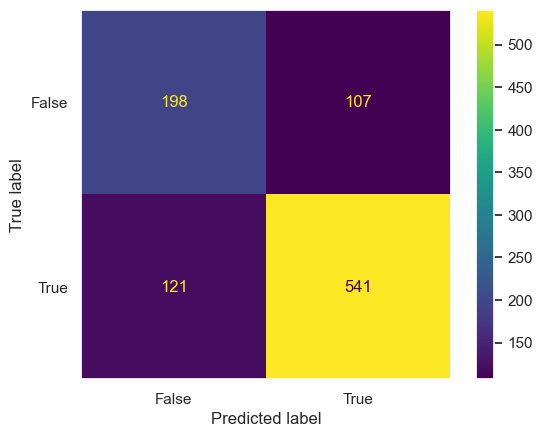

True negative: 198
False postive: 107
False negative: 121
True postive: 541


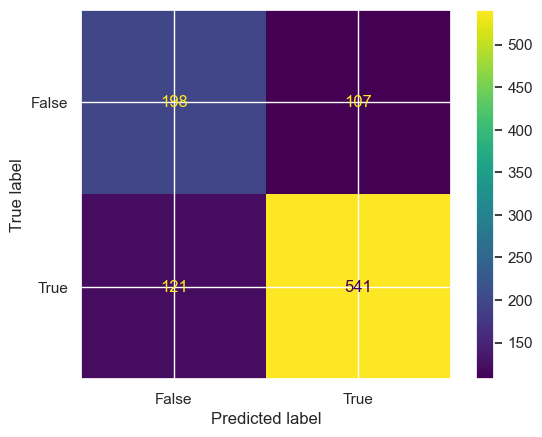

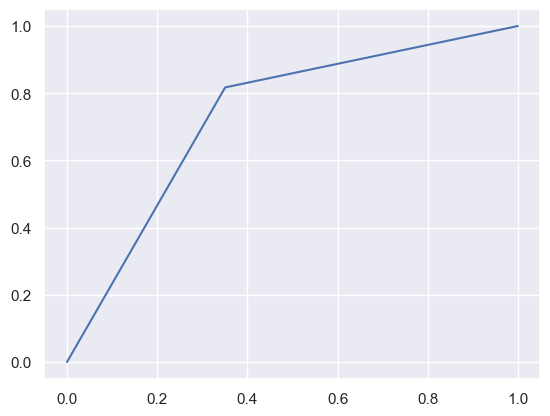

In [85]:
### step-1 divide the data into input and target columns
x=df.drop('Customer Status', axis = 1)
y=df['Customer Status']

### step-2 divide the data into 4 parts
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### step-3 outlier analysis

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

### step 4 - train the model

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

### step 5 - Predictions

y_pred_dt = dtree.predict(x_test)

### step 6-  Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

### step 7 - confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = cmt, display_labels = [False, True])

disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

disp.plot()
plt.show()
#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(x_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Decision Tree 
**Without hyperparameter Tuning**

accuracy_score 75.18
f1_score 0.81
precision_score 0.83
recall_score 0.78


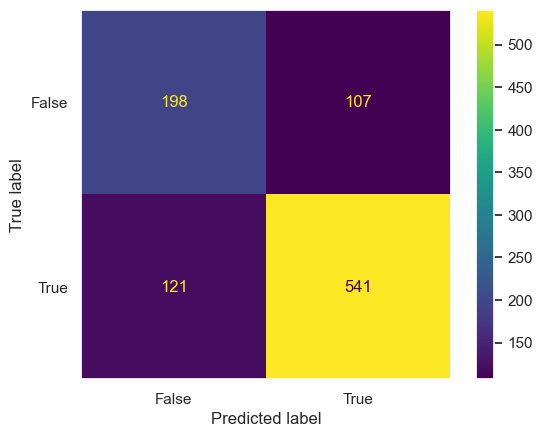

True Negative 229
False Positive 101
False Negative 139
True Positive 498


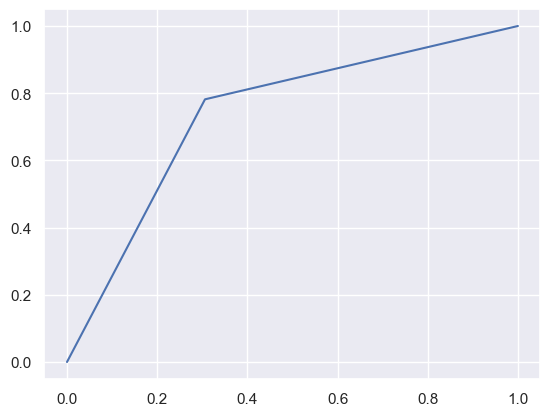

In [86]:
# =======================Divide the data into input and target ===========================

x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

# ========================= Train Test Split ====================================

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# ======================== Outlier analysis based on z-score ==========================

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

thershold = 3

outlier_indices = np.where(z_scores > thershold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# ============================= Train the Model ============================
from sklearn.tree import DecisionTreeClassifier

DT  = DecisionTreeClassifier()

DT.fit(x_train,y_train)

# =============================== Prediction ==============================

y_pred_dt = DT.predict(x_test)

# =============================== Metrics =================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_score_dt = round(accuracy_score(y_test,y_pred_dt) * 100,2)
f1_dt = round(f1_score(y_test, y_pred_dt),2)
precision_dt = round(precision_score(y_test, y_pred_dt),2)
recall_dt = round(recall_score(y_test,y_pred_dt),2)

print('accuracy_score', accuracy_score_dt)
print('f1_score', f1_dt)
print('precision_score', precision_dt)
print('recall_score',recall_dt)

# ============================= Confusion Matrics ====================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmt = confusion_matrix(y_test,y_pred_dt)

cmt_disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()

print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
print('True Positive', tp)

# ==================================== ROC-AUC Curve =================================

y_pred_dt_prob = DT.predict_proba(x_test)[:,1]

fpr, tpr, thershold = roc_curve(y_test, y_pred_dt_prob) # it required y_prediction_probability not just y_prediction
plt.plot(fpr,tpr)
plt.show()


### Logistic Regression 
**Without hyperparameter tuning**

c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 74.66
f1_score 0.81
precision_score 0.79
recall_score 0.83


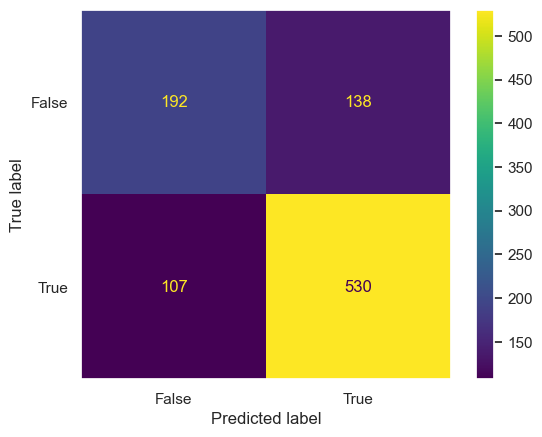

True negative: 192
False postive: 138
False negative: 107
True postive: 530


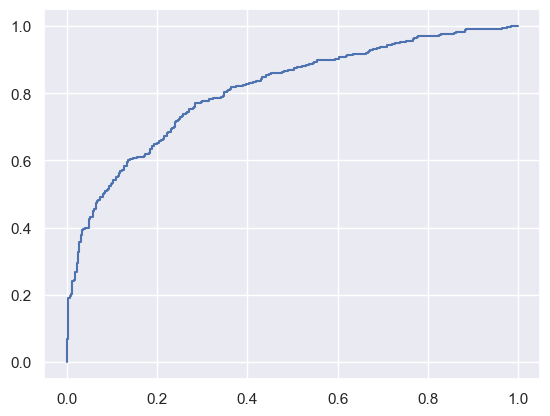

In [87]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=123)

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

LogR.fit(x_train,y_train)

y_pred_logr = LogR.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_LogR = round(accuracy_score(y_test, y_pred_logr)*100,2)
f1_LogR = round(f1_score(y_test,y_pred_logr),2)
precision_LogR = round(precision_score(y_test, y_pred_logr),2)
recall_LogR = round(recall_score(y_test,y_pred_logr),2)

print('accuracy_score', acc_LogR)
print('f1_score', f1_LogR)
print('precision_score', precision_LogR)
print('recall_score',recall_LogR)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cmt_LogR = confusion_matrix(y_test, y_pred_logr)

cmt_LogR_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_LogR, display_labels=[False, True])

cmt_LogR_disp.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logr).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

y_pred_LogR_prob = LogR.predict_proba(x_test)[:,1]
fpr, tpr, thershold = roc_curve(y_test, y_pred_LogR_prob)
plt.plot(fpr,tpr)
plt.show()



### Naive Bayes
**Without hyperparameter tuning**

accuray is: 75.59
F1 is: 0.8
Precision is: 0.85
Recall is: 0.76


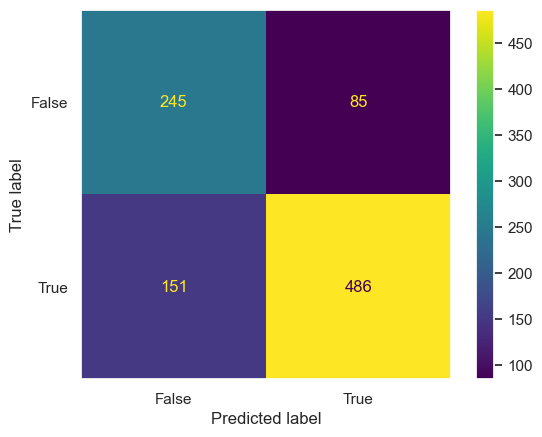

True negative: 245
False postive: 85
False negative: 151
True postive: 486


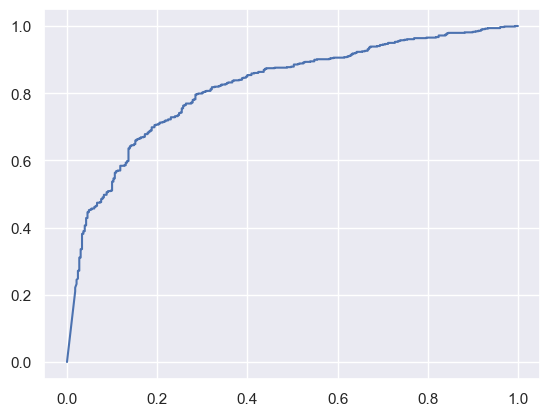

In [88]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

from scipy import stats
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
z_scores = np.abs(stats.zscore(x_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])


from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)

y_pred_NB = NB.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_NB = round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB = round(f1_score(y_test, y_pred_NB),2)
precision_NB = round(precision_score(y_test,y_pred_NB),2)
recall_NB =round(recall_score(y_test, y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmt_NB = confusion_matrix(y_test, y_pred_NB)

cmt_NB_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_NB, display_labels=[False,True])

cmt_NB_disp.plot()
plt.grid()
plt.show()

tn,fp,fn,tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

y_pred_NB_prob = NB.predict_proba(x_test)[:,1]

fpr, tpr, thershold = roc_curve(y_test, y_pred_NB_prob)
plt.plot(fpr,tpr)
plt.show()



### KNN
**Without hyperparameter tuning**

In [89]:
# pip uninstall scikit-learn
# pip install scikit-learn==1.2.2


In [90]:
# x = df.drop('Customer Status',axis=1)
# y = df['Customer Status']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# from scipy import stats

# # Define the columns for which you want to remove outliers
# selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
#                     'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# # Calculate the Z-scores for the selected columns in the training data
# z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# # Set a threshold value for outlier detection (e.g., 3)
# threshold = 3

# # Find the indices of outliers based on the threshold
# outlier_indices = np.where(z_scores > threshold)[0]

# # Remove the outliers from the training data
# x_train = x_train.drop(x_train.index[outlier_indices])
# y_train = y_train.drop(y_train.index[outlier_indices])

# from sklearn.neighbors import KNeighborsClassifier

# KNN = KNeighborsClassifier()
# KNN.fit(x_train,y_train)

# y_pred_knn = KNN.predict(x_test.values)

# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)
# f1_knn = round(f1_score(y_test, y_pred_knn),2)
# precision_knn = round(precision_score(y_test,y_pred_knn),2)
# recall_knn =round(recall_score(y_test, y_pred_knn,2))

# print("accuray is:",acc_knn)
# print("F1 is:",f1_knn)
# print("Precision is:",precision_knn)
# print("Recall is:",recall_knn)

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cmt_knn = confusion_matrix(y_test, y_pred_knn)

# cmt_knn_disp = ConfusionMatrixDisplay(confusion_matrix=cmt_knn, display_labels=[False,True])

# cmt_knn_disp.plot()
# plt.grid()
# plt.show()

# tn,fp,fn,tp = confusion_matrix(y_test,y_pred_knn).ravel()
# print("True negative:",tn)
# print("False postive:",fp)
# print("False negative:",fn)
# print("True postive:",tp)

# y_pred_knn_prob = KNN.predict_proba(x_test)[:,1]

# fpr, tpr, thershold = roc_curve(y_test, y_pred_knn_prob)
# plt.plot(fpr,tpr)
# plt.show()

In [91]:
# X = df.drop('Customer Status', axis=1)
# y = df['Customer Status']


# # ================================Step-2:  divide data into 4 parts  X_train,X_test,Y_train,Y_test======================

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# # ========================Step-3: Outlier analysis based on z-score========================================

# from scipy import stats
# selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
#                     'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
# z_scores = np.abs(stats.zscore(X_train[selected_columns]))
# threshold = 3
# outlier_indices = np.where(z_scores > threshold)[0]
# X_train = X_train.drop(X_train.index[outlier_indices])
# y_train = y_train.drop(y_train.index[outlier_indices])

# # ===============================Step-4:  Train the Model===================================================

# from sklearn.neighbors import KNeighborsClassifier
# KN=KNeighborsClassifier()
# KN.fit(X_train, y_train)

# # =============================Step-5:  Predictions============================================================

# y_pred_log=KN.predict(X_test)

# # ============================ Step-6: Metrics==================================================================

# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
# acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
# f1_log=round(f1_score(y_test,y_pred_log),2)
# precision_log=round(precision_score(y_test,y_pred_log),2)
# recall_log=round(recall_score(y_test,y_pred_log),2)
# print("accuray is:",acc_log)
# print("F1 is:",f1_log)
# print("Precision is:",precision_log)
# print("Recall is:",recall_log)

# # ================================Step-7:Confusion matrix=========================================================================
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cmt=confusion_matrix(y_test,y_pred_log)

# disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
#                             display_labels = [False, True])
# disp.plot()
# plt.grid(False)
# plt.show()


# tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
# print("True negative:",tn)
# print("False postive:",fp)
# print("False negative:",fn)
# print("True postive:",tp)

# #=======================================Step-8: ROC-AUC curve================================================================

# y_log_pred_prob=KN.predict_proba(X_test)[:,1]   # Class-1 probabilities
# fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
# plt.plot(fpr,tpr)
# plt.show()

In [92]:
# # import packages 
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme(color_codes=True)                   # To get diffent different colors
# pd.set_option('display.max_columns', None)       # To display the max columns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# # read
# df = pd.read_csv(r'C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv')

# # 
# X = df.drop('Customer Status', axis=1)
# y = df['Customer Status']
# ## 
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# ## outliers
# from scipy import stats

# # Define the columns for which you want to remove outliers
# selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
#                     'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# # Calculate the Z-scores for the selected columns in the training data
# z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# # Set a threshold value for outlier detection (e.g., 3)
# threshold = 3

# # Find the indices of outliers based on the threshold
# outlier_indices = np.where(z_scores > threshold)[0]

# # Remove the outliers from the training data
# X_train = X_train.drop(X_train.index[outlier_indices])
# y_train = y_train.drop(y_train.index[outlier_indices])

# # model
# from sklearn.neighbors import KNeighborsClassifier
# KNN = KNeighborsClassifier()
# KNN.fit(X_train,y_train)

# #####################################################################################################3

# X_test_array = X_test.to_numpy()
# y_predictions = KNN.predict(X_test_array)


# #########################################################################################################3
# tn,fp,fn,tp=confusion_matrix(y_test,y_predictions).ravel()


# acc_knn=round(accuracy_score(y_test,y_predictions)*100,2)
# pre_knn=round(precision_score(y_test,y_predictions)*100,2)
# rec_knn=round(recall_score(y_test,y_predictions)*100,2)
# f1_knn=round(f1_score(y_test,y_predictions)*100,2)

# print("accuracy is",acc_knn)
# print("prescision is",acc_knn)
# print("recall is",acc_knn)
# print("f1 score is",acc_knn)

# ##################################################################################################################

# cmt=confusion_matrix(y_test,y_predictions)
# ConfusionMatrixDisplay(cmt).plot()
# plt.grid(False)
# plt.show()

# tn, fp, fn, tp = confusion_matrix(y_test,y_predictions).ravel()
# print("True negative:",tn)
# print("False postive:",fp)
# print("False negative:",fn)
# print("True postive:",tp)

# ####################################################################################

# y_predict_prob = KNN.predict_proba(X_test_array)


# #####################################################################################3

# fpr, tpr, thresholds = roc_curve(y_test,y_predict_prob[:,1])
# plt.plot(fpr,tpr)
# plt.show()

c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy is 73.73
prescision is 0.79
recall is 0.84
f1 score is 0.81


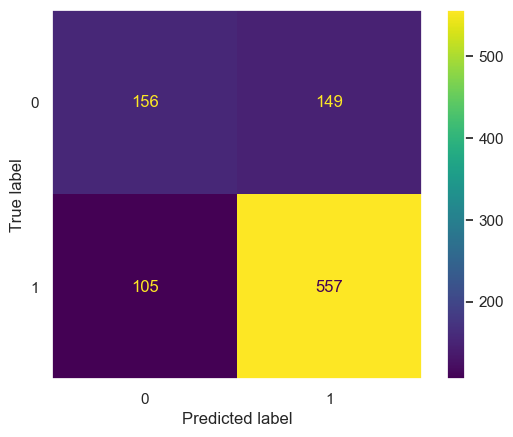

True negative: 156
False postive: 149
False negative: 105
True postive: 557


c:\Users\sahil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


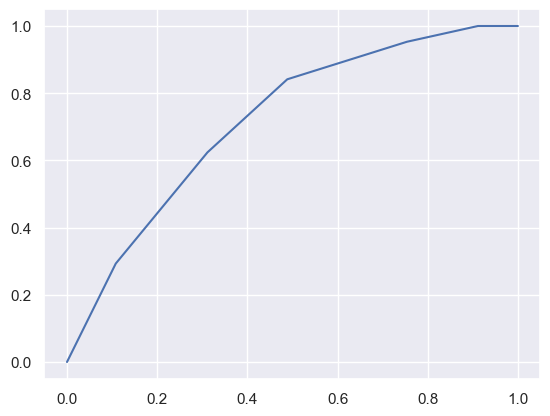

In [93]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)                   # To get diffent different colors
pd.set_option('display.max_columns', None)       # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# read
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv")

# 
X = df.drop('Customer Status', axis=1)
y = df['Customer Status']
## 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## outliers
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

#####################################################################################################3

y_predictions = KNN.predict(X_test.values)

#########################################################################################################3
tn,fp,fn,tp=confusion_matrix(y_test,y_predictions).ravel()


acc_knn=round(accuracy_score(y_test,y_predictions)*100,2)
pre_knn=round(precision_score(y_test,y_predictions),2)
rec_knn=round(recall_score(y_test,y_predictions),2)
f1_knn=round(f1_score(y_test,y_predictions),2)

print("accuracy is",acc_knn)
print("prescision is",pre_knn)
print("recall is",rec_knn)
print("f1 score is",f1_knn)

##################################################################################################################

cmt=confusion_matrix(y_test,y_predictions)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_predictions).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

####################################################################################

y_predict_prob = KNN.predict_proba(X_test.values)


#####################################################################################3

fpr, tpr, thresholds = roc_curve(y_test,y_predict_prob[:,1])
plt.plot(fpr,tpr)
plt.show()

### Hypereparameter Tuning
parameter : it gigen by model
            in the process of develovement , some parameter will evolve


Hyper-Parameter means : Model Function and Arguments

In [94]:
import pandas as pd
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score

In [95]:
df.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [96]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status'] 


x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [97]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [98]:
DT.get_params() # this is all the hyperparameter of decision tree

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [99]:
param_grid = {
    'criterion': ['gini', 'entropy'], # 2
    'max_depth': [3,4,5,6,7,8], # 6
    'min_samples_split': [2,3,4], #3
    'min_samples_leaf': [1,2,3,4], # 4
    'random_state': [0,42] # 2
}
# 2*6*3*4*2 = 288

In [100]:
grid_search = GridSearchCV(DT, param_grid, scoring='accuracy', cv = 5, verbose=True)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [101]:
import time
start = time.time()
grid_search.fit(x_train, y_train)
end= time.time()
print("total time taken: ", (end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
total time taken:  144.0132372379303


In [102]:
grid_search.best_estimator_

# best estimator is your model 
# if you 

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=0)

In [103]:
grid_search.best_score_

0.7955076198976437

In [104]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [105]:
accuracy_list = cross_val_score(grid_search.best_estimator_,
                                x_train,
                                y_train,
                                cv = 5,
                                scoring='accuracy')
accuracy_list

array([0.79844961, 0.78294574, 0.78165375, 0.81630013, 0.79818887])

In [106]:
accuracy_list.mean() # this should be equal to the grid_search.best_estimator_ value

# then is consider our 

0.7955076198976437

- step1: we created a base model
       - with default parameters
- step2: we created a parameters dicitonary file
- step3: we apply GridSearchCV
       - we use base model and parameter dictionary file
       - Inside the GridSearchCV
- step4: we need to pass the data on GridSearchCV
- step5: Then after so many combinations check
       - best estimators [ best model] 
       - best score
       - best parameters
- step6: (optional) cross validation score
       - if we pass the best estimator model for cv = 5
       - The mean accuracy = Best score

In [107]:
# # All in  one shot

# # ======================== Step 1 get the best model ===============================================

# from sklearn.model_selection import DecisionTreeClassifier

# DT = DecisionTreeClassifier()
# DT.fit(x_train,y_train)

### Now we again develope thne model with the best patameter that we get from the typerparameter tuning 
- use this code to get the best hyperparameter for the model
- then again develope model with these parameter only
- grid_search.best_params_

In [108]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 4, min_samples_split= 2, random_state= 0)

DT.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=0)

In [109]:
y_pred = DT.predict(x_test)

# tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()


acc_dt= accuracy_score(y_test,y_pred)*100
pre_dt= precision_score(y_test,y_pred)
rec_dt= recall_score(y_test,y_pred)
f1_dt= f1_score(y_test,y_pred)

print("accuracy is",acc_dt)
print("prescision is",pre_dt)
print("recall is",rec_dt)
print("f1 score is",f1_dt)


accuracy is 79.31747673216132
prescision is 0.832572298325723
recall is 0.858712715855573
f1 score is 0.8454404945904173


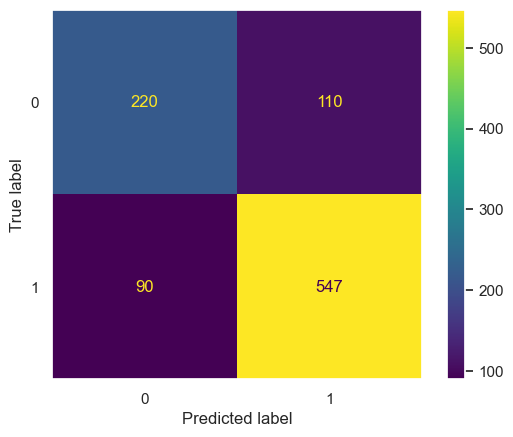

True negative: 220
False postive: 110
False negative: 90
True postive: 547
y_predict_prob [[0.44179104 0.55820896]
 [0.         1.        ]
 [0.11111111 0.88888889]
 ...
 [0.78313253 0.21686747]
 [0.         1.        ]
 [0.02052786 0.97947214]]
FPR [0.         0.21515152 0.23939394 0.33333333 0.36363636 0.37878788
 0.4        0.41818182 0.42727273 0.43030303 0.43333333 0.44242424
 0.45757576 0.48484848 0.52424242 0.53030303 0.54242424 0.56060606
 0.56666667 0.58484848 0.6        0.6030303  0.60909091 0.69090909
 0.70606061 0.71515152 0.72727273 0.73030303 0.73030303 0.73636364
 0.78787879 0.78787879 0.79090909 0.79090909 0.8030303  0.80606061
 0.80909091 0.83939394 0.9030303  0.9030303  0.91212121 0.91212121
 0.95151515 0.97878788 1.        ]
TPR [0.         0.22605965 0.23861852 0.33437991 0.35478807 0.37676609
 0.39717425 0.4144427  0.42229199 0.43014129 0.433281   0.43642072
 0.44270016 0.48822606 0.52904239 0.54474097 0.56828885 0.57299843
 0.58241758 0.59497645 0.6043956  0.60596

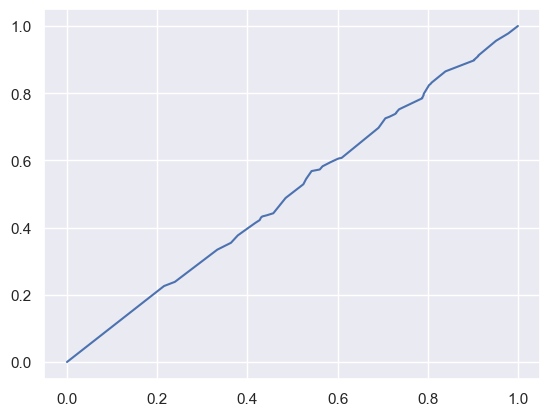

In [110]:
cmt=confusion_matrix(y_test,y_pred)
dist = ConfusionMatrixDisplay(cmt) #display_labels=[False,True])
dist.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

####################################################################################

y_predict_prob = DT.predict_proba(X_test)
print('y_predict_prob', y_predict_prob)

#####################################################################################3

fpr, tpr, thershold1 = roc_curve(y_test,y_predict_prob[:,1])
print('FPR',fpr)
print('TPR',tpr)
print('thersholds',thershold1)
plt.plot(fpr,tpr)
plt.show()